<a href="https://colab.research.google.com/github/exponentialR/DeepLearningFundamentals/blob/main/Visualising_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch 
import torchvision 
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader 
from torchvision import transforms 

data_transform = transforms.ToTensor()

test_data = FashionMNIST(root = './data', train = False, download = True, transform = data_transform)

print('Test data, number of images:', len(test_data))


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw




Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw




Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw




Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


NameError: ignored

In [2]:
batch_size = 10 
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle = True)

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

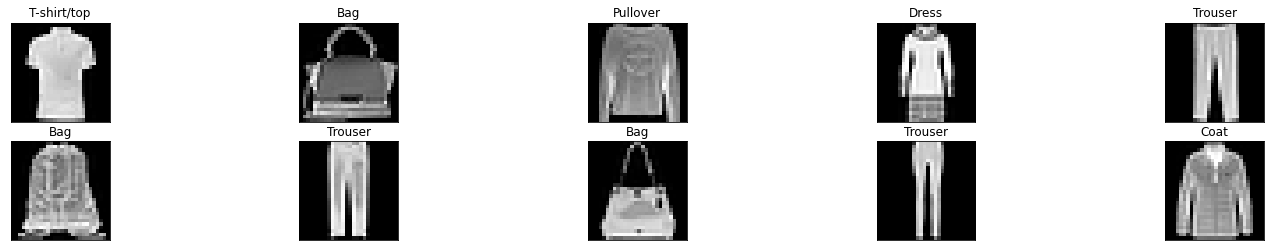

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(test_loader)
images, labels = dataiter.next()
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, batch_size/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(classes[labels[idx]])

###Define the network Architecture

These are 
> COnv Layers 
> Pooling Layers 
> FC layers/Linear Layers


In [4]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()

    self.conv1 = nn.Conv2d(1, 10, 3)
    self.pool = nn.MaxPool2d(2, 2)

    self.conv2 = nn.Conv2d(10, 20, 3)
    self.fc1 = nn.Linear(20*5*5, 50)

    #Add dropout 
    self.fc1_drop = nn.Dropout(p=0.4)
    self.fc2 = nn.Linear(50, 10)
  #Define the feed forward NN

  def forward(self, x ):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))

    #Flatten 
    x = F.relu(self.fc1(x))
    x = self.fc1_drop(x)
    x = self.fc2(x)

    return x

In [5]:
# instantiate your Net
net = Net()

# load the net parameters by name
net.load_state_dict(torch.load('saved_models/fashion_net_ex.pt'))

print(net)

FileNotFoundError: ignored

First convolutional layer


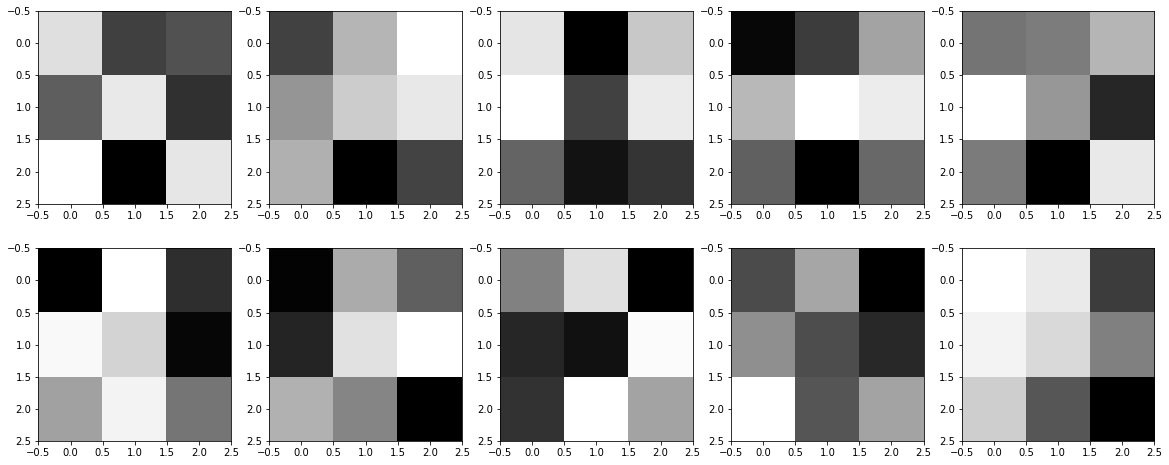

In [9]:
#Get weights of the first convolutional layer
weights = net.conv1.weight.data
w = weights.numpy() 

fig = plt.figure(figsize = (20, 8))
columns = 5
rows =2 
for i in range(0, columns*rows):
  fig.add_subplot(rows, colums, i+1)
  plt.imshow(w[i][0], cmap = 'gray')

print('First convolutional layer')
plt.show()

weights = net.conv2.weight.data
w = weights.numpy()


Using OPencv to apply these filters, one could sample test images and produce series of activation maps 

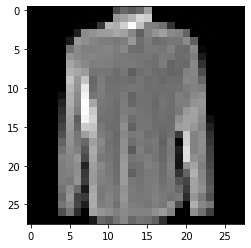

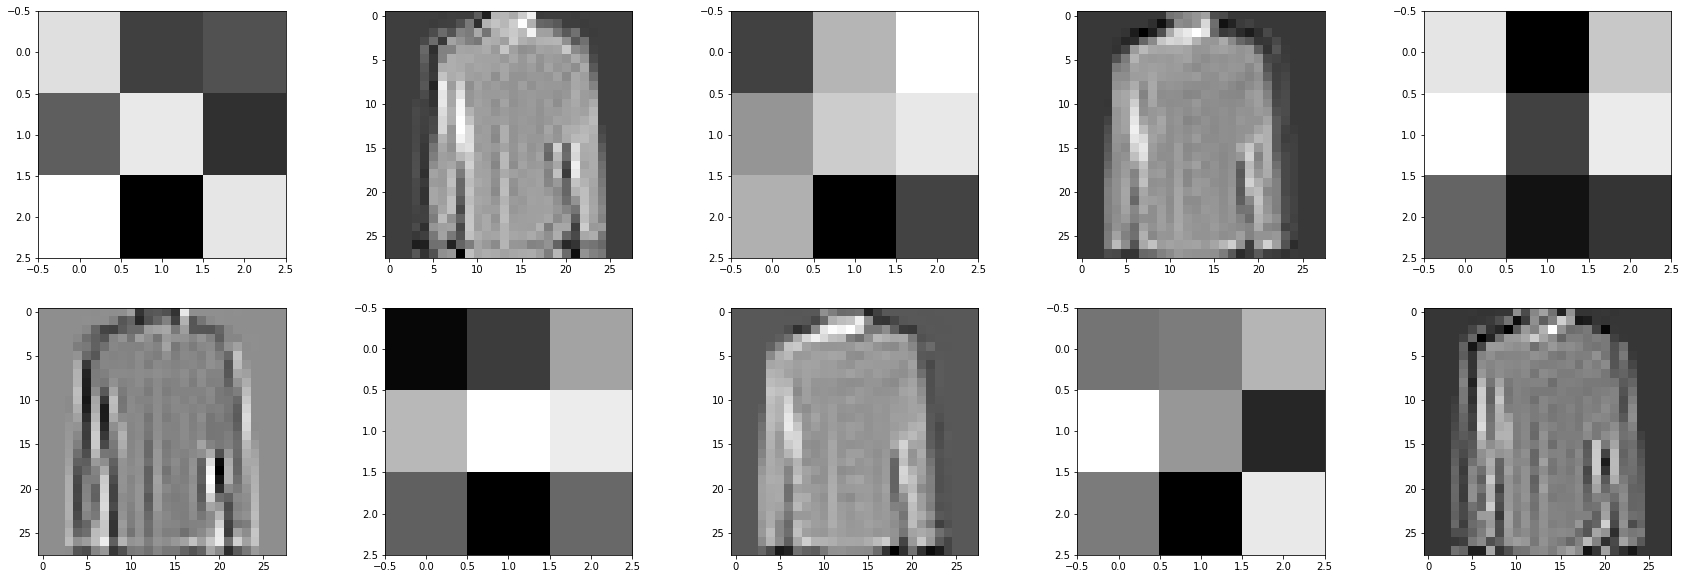

In [10]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

images = images.numpy()

idx = 3
img = np.squeeze(images[idx])

import cv2
plt.imshow(img, cmap = 'gray')

weights = net.conv1.weight.data
w = weights.numpy()

#visualize for the first conv layer for 10 filters 
fig = plt.figure(figsize=(30, 10))

columns = 5*2
rows = 2 

for i in range(0, colums*rows):
  fig.add_subplot(rows, colums, i+1)
  if((i%2)==0):
    plt.imshow(w[int(i/2)][0], cmap = 'gray')
  else: 
    c = cv2.filter2D(img, -1, w[int((i-1)/2)][0])
    plt.imshow(c, cmap ='gray')
plt.show()

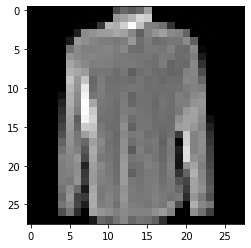

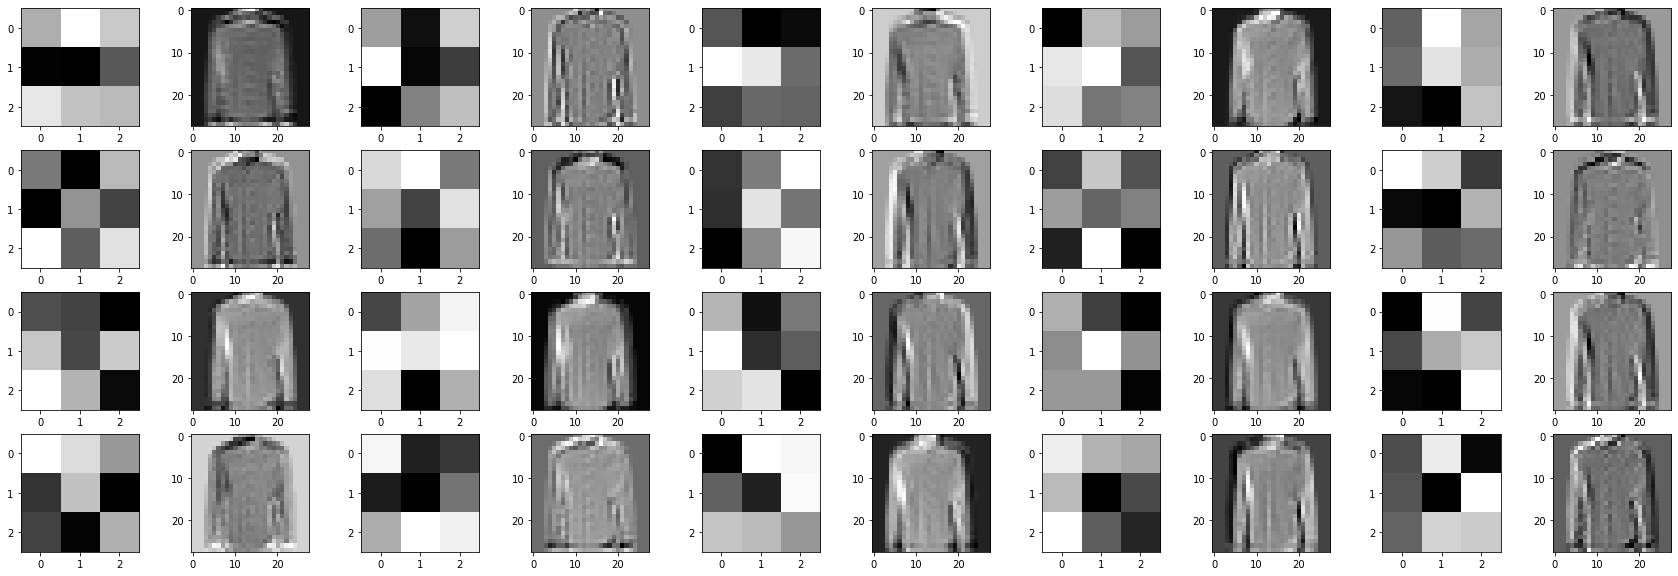

In [11]:
#Using the same process, visualise the 2nd Convolutional layer 
plt.imshow(img, cmap='gray')

# second conv layer, conv2
weights = net.conv2.weight.data
w = weights.numpy()

# 1. first conv layer
# for 20 filters
fig=plt.figure(figsize=(30, 10))
columns = 5*2
rows = 2*2
for i in range(0, columns*rows):
    fig.add_subplot(rows, columns, i+1)
    if ((i%2)==0):
        plt.imshow(w[int(i/2)][0], cmap='gray')
    else:
        c = cv2.filter2D(img, -1, w[int((i-1)/2)][0])
        plt.imshow(c, cmap='gray')
plt.show()